In [1]:
import trig_poly_v0 as trig_poly
import dual_certificates_v0 as dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt
%matplotlib inline
figsize = (8,6)

In [8]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)
reload(plt_util)

m = 10
fc =1000
min_separation = 0.9/fc
#N = int(1.0/min_separation-1)
N = m
# N = 5

kernel = trig_poly.TrigPoly.dirichlet(fc)

# support = test_data.jittered_supports(N, min_separation)
support = test_data.exact_supports(N, min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m, orthogonal= True, sparse = True)

# Multiply sign pattern with random unitary
# G = np.random.normal(size=(N, N)) + np.random.normal(size=(N, N)) * 1.0j
# Q, R = np.linalg.qr(G)
# sign_pattern = np.dot(Q, sign_pattern)

In [9]:
# interpolator_1 = dual_certificates.interpolate_multidim(support, sign_pattern, kernel)
interpolator_2,coeffs_2, _, kernel_1 = dual_certificates.interpolate_multidim_with_derivative(support, sign_pattern, kernel)

# interpolator_3 = dual_certificates.interpolate_multidim_adjacent_samples(support, sign_pattern, kernel, random_derivatives = False)
# interpolator_4 = dual_certificates.interpolate_multidim_adjacent_samples(support, sign_pattern, kernel, random_derivatives = True)

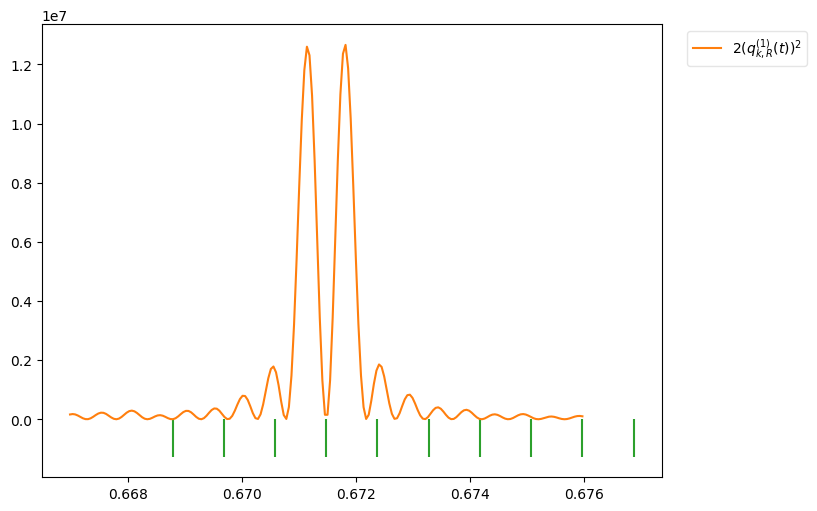

In [10]:
reload(plt_util)
points = 200
# interpolator = interpolator_2
# extension = min_separation
# ts = np.linspace(max(support[3] - extension, 0), min(support[6] + extension , 1.0), points)
# values = interpolator(ts)

# plt.figure(figsize=figsize, dpi=100)
# ax = plt.gca()

# ys = np.linalg.norm(values[(4,5),:], axis=0)
# ax.plot(ts, ys, c='C0', label = r'$N(t)$')
# ys = np.linalg.norm(values[[a for a in range(m) if a not in (4,5) ],:], axis=0) + np.linalg.norm(values[(4,5),:], axis=0)
# ax.plot(ts, ys, c='C1', label = r'$N(t)$')

# # for k in [qss-1 for qss in qs]:
# #     ys = values[k,:]
# #     ax.plot(ts, np.absolute(ys), c = 'C'+str(j), label = r'$\Vert q_{%d}(t)\Vert $'%(k+1) )
# #     j  = j+1



# plt_util.plot_support_magnitude_lines(support, start = 0.9,  c = 'C2' )
# ax.axhline(1.0, c = 'C3')

# leg = plt.legend(loc=2, ncol=1, fancybox=True, bbox_to_anchor=(1.03, 1))
# leg.get_frame().set_alpha(0.5)

k=4
extension = 3*min_separation
# extension = 1
hops = 2
ts = np.linspace(max(support[k-1-hops] - extension,0), min(support[k-1+hops] + extension , 1.0), points)
# ts = np.linspace(support[0] - extension, support[-1] + extension, points)
# plt_util.plot_2ndder_zoom(interpolator_2, support, q = q, ts = ts, hops = hops)
plt_util.plot_2ndder_bycomponent(interpolator_2, support, ts, k)


In [14]:
interpolator_2(ts)

array([[  5.49427364e-01 +4.52800774e-15j,
          6.64674205e-01 +3.37728977e-15j,
          7.69098147e-01 +1.77467633e-15j, ...,
         -5.85506032e-04 -1.92069396e-14j,
          4.31824767e-03 -5.52294213e-14j,
          8.80454929e-03 -8.69450996e-14j],
       [ -4.76057247e-02 -1.29285688e-14j,
         -7.13782490e-02 -7.61581553e-15j,
         -8.73094363e-02 -4.18816457e-15j, ...,
          1.21622308e-02 -1.25974535e-14j,
          8.42401100e-03 +3.86232929e-14j,
          4.01658103e-03 +8.64091513e-14j],
       [ -5.09258512e-02 -1.29337188e-14j,
         -3.80673933e-02 -7.78817657e-15j,
         -2.49290474e-02 -4.14897066e-15j, ...,
         -1.68034680e-02 +2.59297792e-14j,
         -1.60383328e-02 +1.04370397e-13j,
         -1.39277733e-02 +1.74405141e-13j],
       ..., 
       [ -2.33417872e-02 +2.05643201e-14j,
         -1.91230277e-02 +1.22286892e-14j,
         -1.44456001e-02 +6.63412467e-15j, ...,
         -2.66049538e-02 -4.84483872e-14j,
         -2.700148

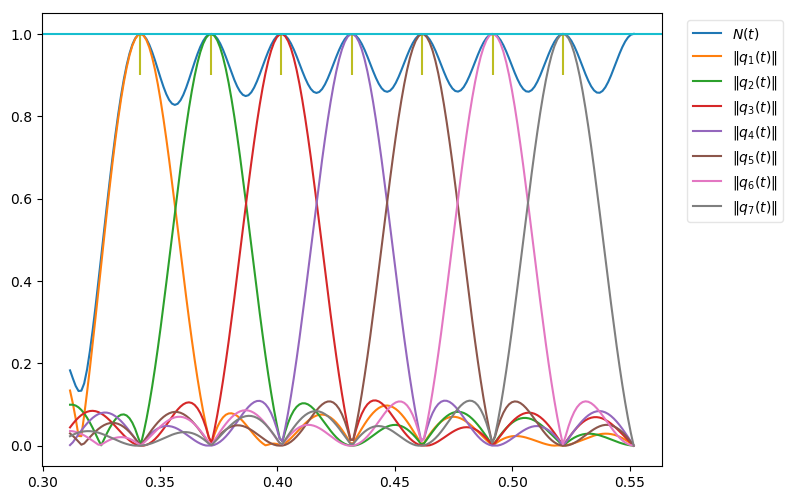

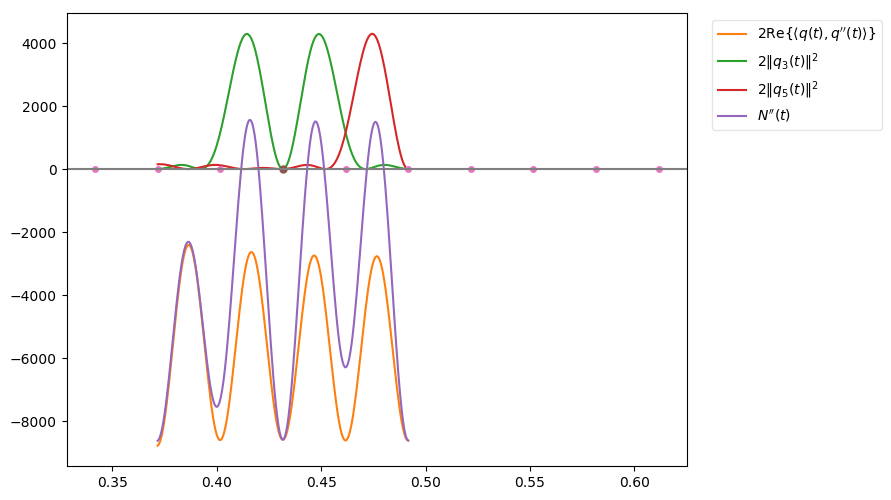

In [67]:
reload(plt_util)
qs = [1,2,3,4,5,6,7]
points = 200
extension = min_separation
# extension = 1
ts = np.linspace(max(support[min(qs)-1] - extension,0), min(support[max(qs)-1] + extension , 1.0), points)
# ts = np.linspace(support[0] - extension, support[-1] + extension, points)
plt_util.plot_individual_magnitude(interpolator_2, support, qs=qs, ts=ts, plot_Nt = True)

# qs = [1]
# hops = 3
# extension = 2*min_separation
# # extension = 1
# ts = np.linspace(support[0] - extension, support[-1] + extension, points)
# plt_util.plot_individual_components(coeffs_2, support, kernel, kernel_1, qs = qs, ts = ts, hops=hops, diff_color = True)

q = 4
extension = min_separation
# extension = 1
hops = 1
ts = np.linspace(max(support[q-1-hops] - extension,0), min(support[q-1+hops] + extension , 1.0), points)
# ts = np.linspace(support[0] - extension, support[-1] + extension, points)
plt_util.plot_2ndder_zoom(interpolator_2, support, q = q, ts = ts, hops = hops)

# plt_util.plot_coeffs(coeffs_2, m, fc)

# plt_util.plot_trig_poly_magnitude_der_2ndder(interpolator_2, support)

# plt.figure(0)
# plt_util.plot_trig_poly_magnitude(interpolator_1)
# plt_util.plot_support_magnitude_lines(support)
# plt_util.plot_magnitude_bounds()
# plt.figure(1)
# plt_util.plot_trig_poly_magnitude(interpolator_2)
# plt_util.plot_support_magnitude_lines(support)
# plt_util.plot_magnitude_bounds()
# plt.figure(2)
# plt_util.plot_trig_poly_magnitude(interpolator_3)
# plt_util.plot_support_magnitude_lines(support)
# plt_util.plot_magnitude_bounds()
# plt.figure(3)
# plt_util.plot_trig_poly_magnitude(interpolator_4)
# plt_util.plot_support_magnitude_lines(support)
# plt_util.plot_magnitude_bounds()

In [40]:
dual_certificates.validate(support, sign_pattern, interpolator_2)

{'bound_achieved': True,
 'max_deviation': 1.4343054571031167e-14,
 'status': True,
 'values_achieved': True}

In [247]:
dual_certificates.validate(support, sign_pattern, interpolator_3)

{'bound_achieved': False,
 'max_deviation': 4.0980616289968964e-16,
 'status': False,
 'values_achieved': True}

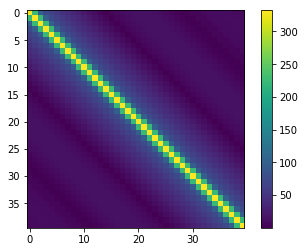

In [85]:
plt.imshow(np.absolute(kernel.derivative().inners_of_shifts(support)))
plt.colorbar()

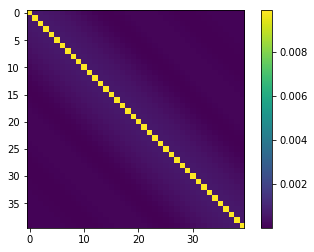

In [86]:
plt.imshow(np.absolute(kernel.inners_of_shifts(support)))
plt.colorbar()

# Phase Transition

In [6]:
reload(phase_transition)
reload(dual_certificates)
reload(test_data)

<module 'test_data' from 'test_data.pyc'>

In [129]:
print(range(3,5))

[3, 4]


In [32]:
fc = 50
m = 10
sizes = range(1, m+1)
separation_ratios = np.linspace(0.1, 0.9, 9)
separations = separation_ratios / fc

In [33]:
%%time
reload(phase_transition)
reload(dual_certificates)
reload(test_data)


# probs = phase_transition.grid_probabilities(
#     test_data.exact_supports,
#     lambda size: test_data.uniform_sign_pattern_multidim(size, m),
#     trig_poly.TrigPoly.dirichlet(fc),
#     dual_certificates.interpolate_multidim,
#     sizes,
#     separations,
#     num_experiments=10,
#     verbose=True,
#     random_derivatives=False,
#     orthogonal_support = True,
#     sparse_support = True)

probs = phase_transition.grid_probabilities_ortho(
    test_data.exact_supports,
    lambda size: test_data.uniform_sign_pattern_multidim(size, m),
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_multidim,
    sizes,
    separations,
    num_experiments=6,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
Wall time: 52 s


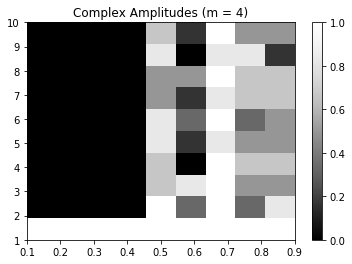

In [34]:
imshow_kwargs = {
    'cmap': 'Greys_r', 
    'extent': [separation_ratios[0], separation_ratios[-1], sizes[0], sizes[-1]], 
    'vmin': 0.0,
    'vmax': 1.0,
    'aspect': 'auto'}

plt.imshow(np.flip(probs, axis=0), **imshow_kwargs)
plt.colorbar()
plt.gca().set_title('Complex Amplitudes (m = 4)')

In [74]:
%%time

probs_10 = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    lambda size: test_data.uniform_sign_pattern_multidim(size, 10),
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_multidim_with_derivative,
    sizes,
    separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


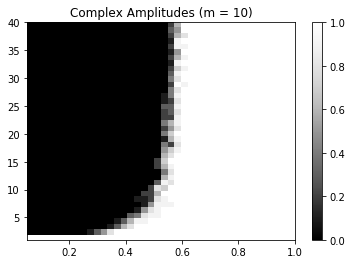

In [75]:
imshow_kwargs = {
    'cmap': 'Greys_r', 
    'extent': [separation_ratios[0], separation_ratios[-1], sizes[0], sizes[-1]], 
    'vmin': 0.0,
    'vmax': 1.0,
    'aspect': 'auto'}

plt.imshow(np.flip(probs_10, axis=0), **imshow_kwargs)
plt.colorbar()
plt.gca().set_title('Complex Amplitudes (m = 10)')

# Timing

In [5]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [16]:
reload(phase_transition)
reload(test_data)
reload(dual_certificates)

fc = 30
m = 4

sizes = np.array([5])
min_separations = np.array([0.5]) / float(fc)

# dual_certificates.interpolate_multidim_wDer
# trig_poly.TrigPoly.__add__

%lprun -f trig_poly.TrigPoly.eval phase_transition.grid_probabilities(test_data.jittered_supports,lambda size: test_data.uniform_sign_pattern_multidim(size, m),trig_poly.TrigPoly.dirichlet(fc),dual_certificates.interpolate_multidim_wDer,sizes,min_separations,num_experiments=10,verbose=True)

0 0
